<a href="https://colab.research.google.com/github/Wayy66/Wayy66/blob/main/5650_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


# Part 1 - Import Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
sns.set()
rand_state=1000

In [ ]:
df = pd.read_csv('diabetes.csv')
# Review datatype for each variables
df.info()

print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# Part 2 - Data Cleaning

In [ ]:
# Generate a list to convert variables into factor
variables_to_convert = [
    'Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
    'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age',
    'Education', 'Income'
]

# Convert variables to categorical factors
for variable in variables_to_convert:
    df[variable] = df[variable].astype('category')

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print columns with missing values and their corresponding counts
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [ ]:
# Replace 'Diabetes_012' with the actual column name if different
diabetes_counts = df['Diabetes_012'].value_counts()

# Print the counts of each class
print("Class Distribution for Diabetes_012:")
print(diabetes_counts)

# Calculate the proportion of each class
total_samples = diabetes_counts.sum()
class_proportions = diabetes_counts / total_samples

# Print the proportions of each class
print("\nClass Proportions for Diabetes_012:")
print(class_proportions)

Class Distribution for Diabetes_012:
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Class Proportions for Diabetes_012:
Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: count, dtype: float64


# Part 3 EDA

In [ ]:
# Replace values 1 and 2 in 'Diabetes_012' with 1
df['Diabetes_012'] = df['Diabetes_012'].replace({1.0: 1, 2.0: 1})

# Calculate correlation matrix
corr_matrix = df.corr()

# Extract correlations of all variables with 'Diabetes_012'
diabetes_corr = corr_matrix['Diabetes_012']

# Sort correlations in descending order
diabetes_corr_sorted = diabetes_corr.abs().sort_values(ascending=False)

# Print correlations
print(diabetes_corr_sorted)

Diabetes_012            1.000000
GenHlth                 0.300785
HighBP                  0.270334
BMI                     0.223851
DiffWalk                0.222155
HighChol                0.210290
Age                     0.185891
HeartDiseaseorAttack    0.176933
PhysHlth                0.174948
Income                  0.172794
Education               0.131803
PhysActivity            0.121392
Stroke                  0.104800
MentHlth                0.074971
CholCheck               0.067879
Smoker                  0.062778
Veggies                 0.059219
HvyAlcoholConsump       0.056682
Fruits                  0.042088
NoDocbcCost             0.038025
Sex                     0.029606
AnyHealthcare           0.014079
Name: Diabetes_012, dtype: float64




```
+-------------------------+--------------------+
|         Feature         |   Correlation (%) |
+-------------------------+--------------------+
|         GenHlth         |       30.08        |
|          HighBP         |       27.03        |
|            BMI          |       22.39        |
|         DiffWalk        |       22.22        |
|         HighChol        |       21.03        |
|            Age          |       18.59        |
| HeartDiseaseorAttack    |       17.69        |
|         PhysHlth        |       17.50        |
|          Income         |       17.28        |
|        Education        |       13.18        |
|      PhysActivity       |       12.14        |
|          Stroke         |       10.48        |
|         MentHlth        |        7.50        |
|        CholCheck        |        6.79        |
|          Smoker         |        6.28        |
|         Veggies         |        5.92        |
|   HvyAlcoholConsump     |        5.67        |
|          Fruits         |        4.21        |
|       NoDocbcCost       |        3.80        |
|           Sex           |        2.96        |
|       AnyHealthcare     |        1.41        |
+-------------------------+--------------------+
```



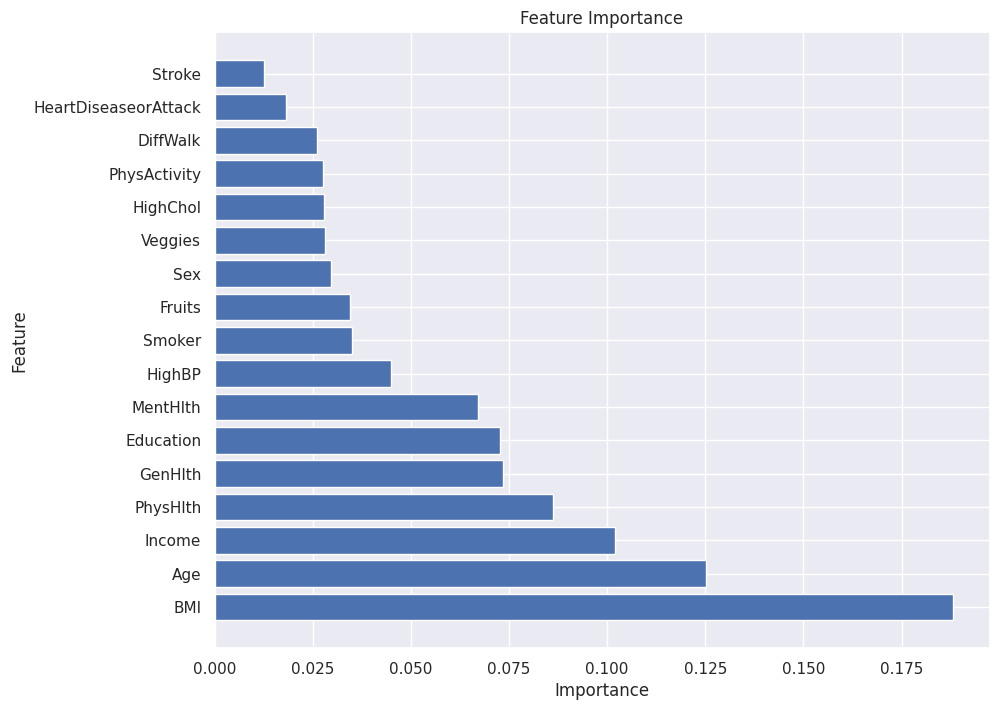

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your feature and target variables for training
# Replace RandomForestClassifier with RandomForestRegressor for regression tasks
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [ ]:
# Remove specified columns
columns_to_remove = ['NoDocbcCost', 'AnyHealthcare', 'HvyAlcoholConsump', 'CholCheck']
df = df.drop(columns=columns_to_remove)

# Part 4 - Split Training and Testing dataset




In [ ]:
from sklearn.model_selection import train_test_split

# Define X with features and y with target variable
X = df.drop('Diabetes_012', axis=1)  # Features
y = df['Diabetes_012']                # Target variable

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

# Part 5 - Generating RF model

In [ ]:
# Apply random forest model
from sklearn.ensemble import RandomForestClassifier

# Set class_weight='balanced' to automatically adjust class weights based on class frequencies
rf_classifier = RandomForestClassifier(class_weight='balanced')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [ ]:
# Make predictions on the test set
y_hat = rf_classifier.predict(X_test)

In [ ]:
# Construct DataFrame with y_test and y_hat
df_predictions = pd.DataFrame({'y_test': y_test, 'y_hat': y_hat})

# Display the DataFrame
print(df_predictions)

       y_test  y_hat
244397    0.0    0.0
237889    0.0    0.0
118029    0.0    0.0
95802     0.0    0.0
65449     1.0    0.0
...       ...    ...
69008     0.0    0.0
112552    0.0    0.0
178070    0.0    0.0
251353    0.0    1.0
246350    0.0    0.0

[76104 rows x 2 columns]


# Part 6 - Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_hat)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_hat)

print("Confusion Matrix:")
print(cm)
print("\nAccuracy:", accuracy)

Confusion Matrix:
[[61493  2501]
 [ 9865  2245]]

Accuracy: 0.8375118259224219




```
# Evaluation Table
+---------------------+-------------------------+-------------------------+
|                     |    Predicted Negative   |    Predicted Positive   |
+---------------------+-------------------------+-------------------------+
|  Actual Negative    |          61493          |           2501          |
+---------------------+-------------------------+-------------------------+
|  Actual Positive    |          9865           |           2245          |
+---------------------+-------------------------+-------------------------+
```

In [ ]:
# Predict probabilities for each class
probabilities = rf_model.predict_proba(X_test)[:, 1]  # Assuming X_test is your test dataset

# Adjust threshold to 0.02
threshold = 0.2

# Make predictions based on the adjusted threshold
predictions = (probabilities >= threshold).astype(int)

# Print the original confusion matrix
print("Original Confusion Matrix:")
print(confusion_matrix(y_test, rf_model.predict(X_test)))

# Print the confusion matrix with adjusted threshold
print("\nConfusion Matrix with Threshold = 0.02:")
print(confusion_matrix(y_test, predictions))

Original Confusion Matrix:
[[61429  2565]
 [ 9603  2507]]

Confusion Matrix with Threshold = 0.02:
[[47129 16865]
 [ 3660  8450]]
